In [10]:
import h5py
my_path = r'c:\Users\David\miniconda3\envs\cil2\share\cil\24737_fd_normalised.nxs'
# Open the file
with h5py.File(my_path, 'r') as file:
    # Explore the file's structure, datasets, etc.
    # For example, list all groups
    print(list(file.keys()))

    # Access a specific dataset
    data = file['entry1']
    # Now 'data' holds the dataset contents, you can manipulate it as needed
    print(data.name)
    print(file)

    for line in file:
        print(line)


['entry1']
/entry1
<HDF5 file "24737_fd_normalised.nxs" (mode r)>
entry1


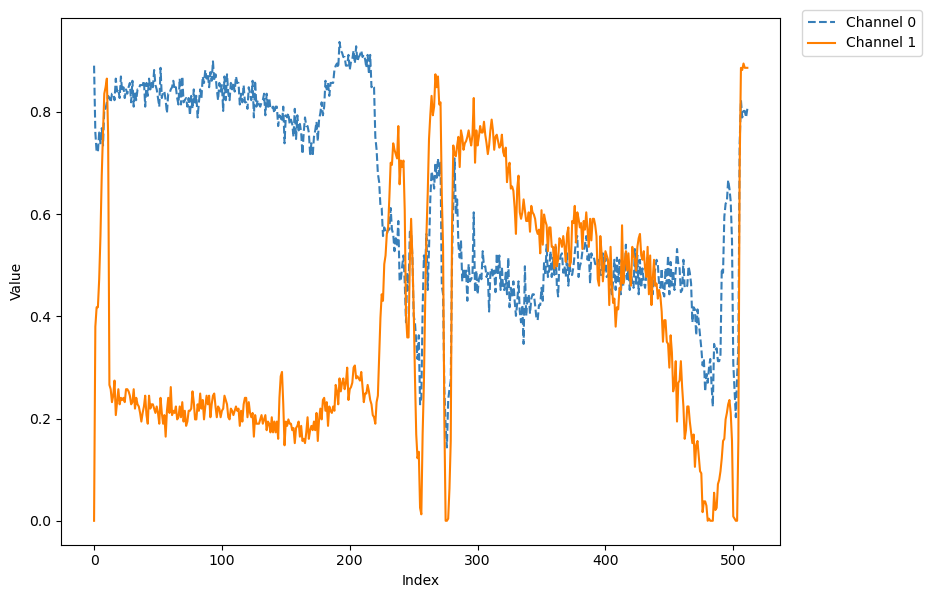

In [1]:
from cil.utilities.display import show1D

from cil.utilities.dataexample import PEPPERS

data = PEPPERS.get()

data_channel0 = data.get_slice(channel=0)

data_channel1 = data.get_slice(channel=1)

show1D([data_channel0, data_channel1], slice_list=[('horizontal_x', 256)],

       label=['Channel 0', 'Channel 1'], line_styles=["--", "-"])

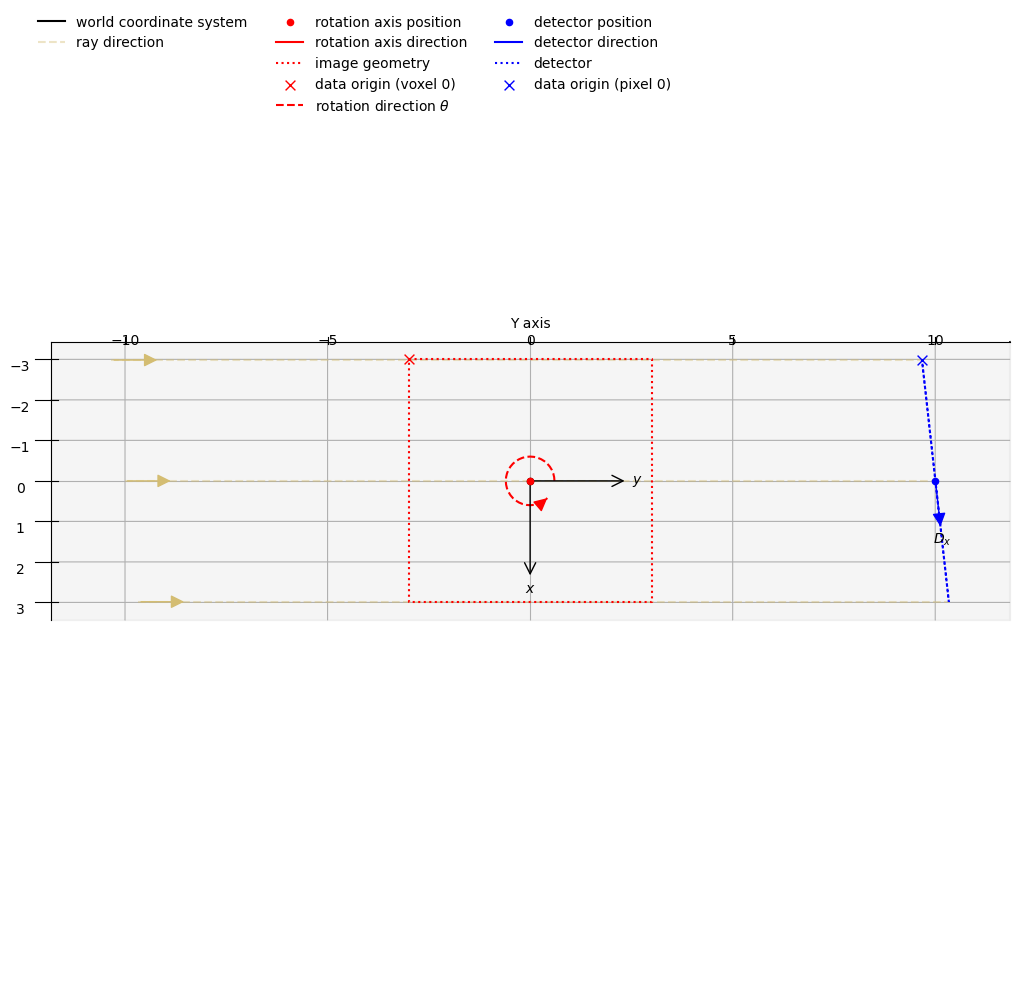

2D Parallel-beam tomography
System configuration:
	Ray direction: [0., 1.]
	Rotation axis position: [0., 0.]
	Detector position: [ 0., 10.]
	Detector direction x: [0.99388373, 0.11043153]
Panel configuration:
	Number of pixels: [3 1]
	Pixel size: [2. 2.]
	Pixel origin: bottom-left
Channel configuration:
	Number of channels: 1
Acquisition description:
	Number of positions: 180
	Angles 0-20 in degrees:
[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
 15., 16., 17., 18., 19.]
Distances in units: units distance


In [4]:
from cil.framework import AcquisitionGeometry
from cil.utilities.display import show_geometry

ag = AcquisitionGeometry.create_Parallel2D(detector_position=[0,10], ray_direction=[0,1], rotation_axis_position=[0,0],detector_direction_x=[0.9,0.1])\
    .set_panel(num_pixels=3,pixel_size = 2)\
    .set_angles(angles=range(0,180))

show_geometry(ag,grid=True)

print(ag)

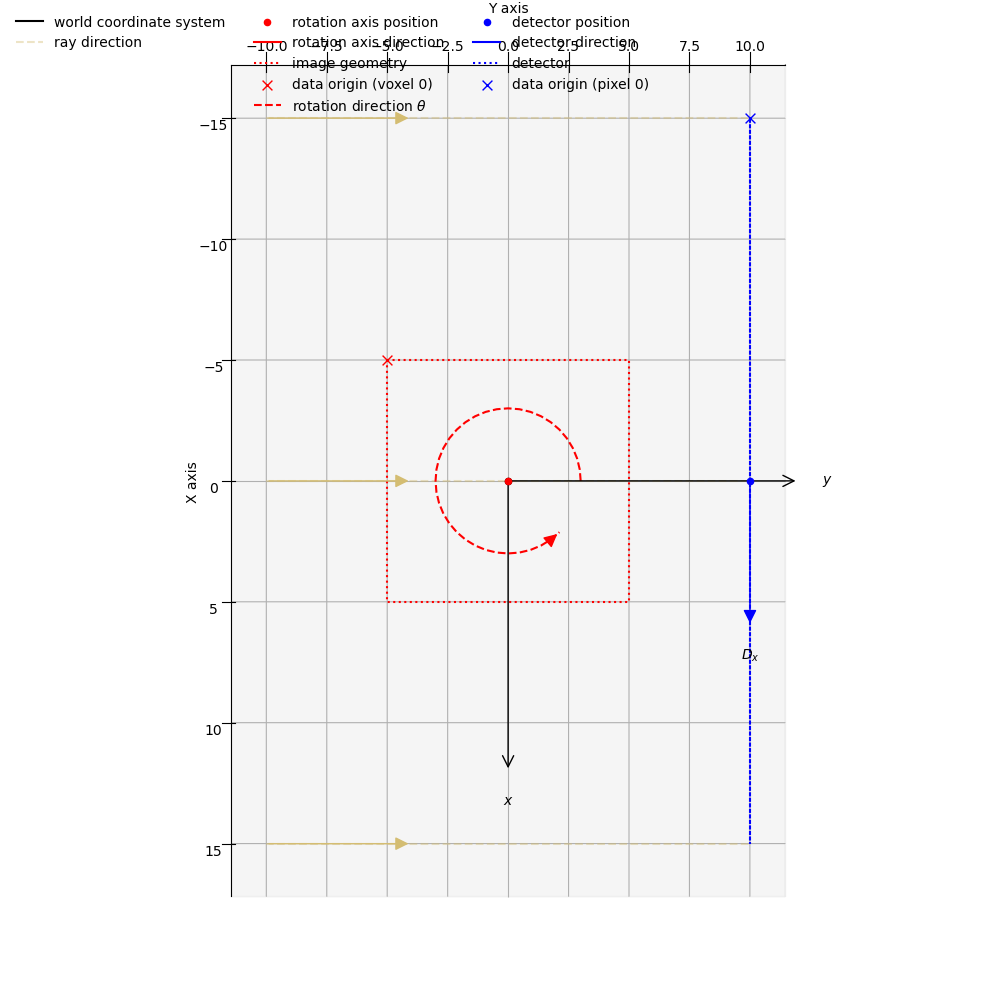

Number of channels: 1
channel_spacing: 1.0
voxel_num : x10,y10
voxel_size : x1.0,y1.0
center : x0,y0

2D Parallel-beam tomography
System configuration:
	Ray direction: [0., 1.]
	Rotation axis position: [0., 0.]
	Detector position: [ 0., 10.]
	Detector direction x: [1., 0.]
Panel configuration:
	Number of pixels: [6 1]
	Pixel size: [5. 5.]
	Pixel origin: bottom-left
Channel configuration:
	Number of channels: 1
Acquisition description:
	Number of positions: 180
	Angles 0-20 in degrees:
[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
 15., 16., 17., 18., 19.]
Distances in units: units distance


In [7]:
from cil.framework import ImageGeometry
ig = ImageGeometry(voxel_num_x=10, voxel_num_y=10, voxel_size_x=1, voxel_size_y=1)

ag = AcquisitionGeometry.create_Parallel2D(detector_position=[0,10], ray_direction=[0,1], rotation_axis_position=[0,0],detector_direction_x=[1,0])\
    .set_panel(num_pixels=6,pixel_size=5)\
    .set_angles(angles=range(0,180))


show_geometry(ag,ig,grid=True)

print(ig)
print(ag)

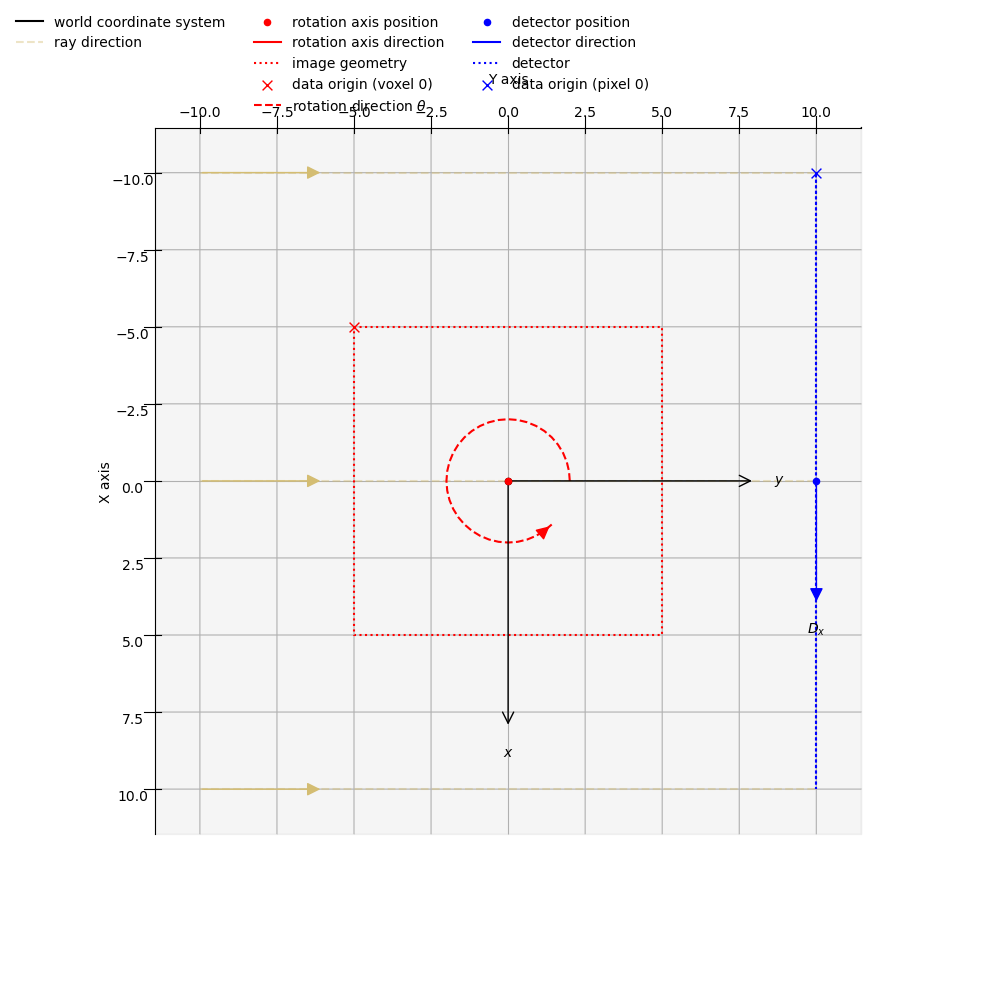

Number of channels: 1
channel_spacing: 1.0
voxel_num : x10,y10
voxel_size : x1.0,y1.0
center : x0,y0

2D Parallel-beam tomography
System configuration:
	Ray direction: [0., 1.]
	Rotation axis position: [0., 0.]
	Detector position: [ 0., 10.]
	Detector direction x: [1., 0.]
Panel configuration:
	Number of pixels: [20  1]
	Pixel size: [1. 1.]
	Pixel origin: bottom-left
Channel configuration:
	Number of channels: 1
Acquisition description:
	Number of positions: 180
	Angles 0-20 in degrees:
[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
 15., 16., 17., 18., 19.]
Distances in units: units distance


In [5]:
from cil.framework import AcquisitionGeometry
from cil.utilities.display import show_geometry
from cil.framework import ImageGeometry
ig = ImageGeometry(voxel_num_x=10, voxel_num_y=10, voxel_size_x=1, voxel_size_y=1)

ag = AcquisitionGeometry.create_Parallel2D(detector_position=[0,10], ray_direction=[0,1], rotation_axis_position=[0,0],detector_direction_x=[1,0])\
    .set_panel(num_pixels=20,pixel_size=1.0)\
    .set_angles(angles=range(0,180))


show_geometry(ag,ig,grid=True)

print(ig)
print(ag)

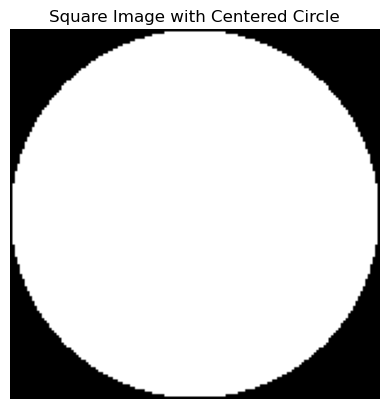

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Image dimensions
image_size = 151  # Size of the square image (256x256 pixels)
radius = image_size // 2  # Radius of the circle

# Initialize a square image with zeros (black)
image = np.zeros((image_size, image_size))

# Create the circle
for y in range(image_size):
    for x in range(image_size):
        # Check if the pixel is inside the circle
        if (x - image_size // 2) ** 2 + (y - image_size // 2) ** 2 < radius ** 2:
            image[y, x] = 1  # Set pixel value to 1 (white) inside the circle

# Display the image
plt.imshow(image, cmap='gray')
plt.title('Square Image with Centered Circle')
plt.axis('off')  # Turn off axis numbers
plt.show()

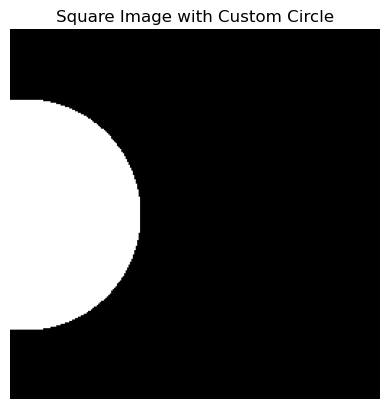

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def create_circle_image(image_size, radius, center):
    # Initialize a square image with zeros (black)
    image = np.zeros((image_size, image_size))

    # Create the circle
    for y in range(image_size):
        for x in range(image_size):
            # Check if the pixel is inside the circle
            if (x - center[0]) ** 2 + (y - center[1]) ** 2 < radius ** 2:
                image[y, x] = 1  # Set pixel value to 1 (white) inside the circle
    
    return image

# Parameters for the image and the circle
image_size = 256  # Size of the square image
radius = 80  # Radius of the circle
center = (10, 128)  # Center of the circle (x, y)

# Create the image
image = create_circle_image(image_size, radius, center)

# Display the image
plt.imshow(image, cmap='gray')
plt.title('Square Image with Custom Circle')
plt.axis('off')  # Turn off axis numbers
plt.show()


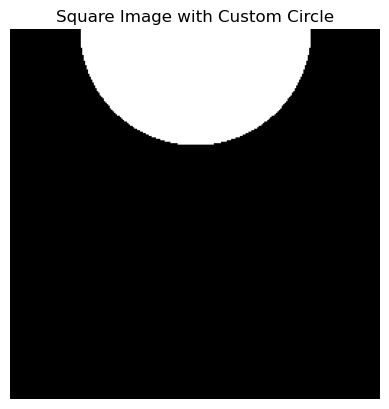

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def create_circle_image(image_size, radius, center):
    # Initialize a square image with zeros (black)
    image = np.zeros((image_size, image_size))

    # Create the circle
    for x in range(image_size):
        for y in range(image_size):
            # Check if the pixel is inside the circle
            # x is now the vertical coordinate, and y is the horizontal coordinate
            if (x - center[0]) ** 2 + (y - center[1]) ** 2 < radius ** 2:
                image[x, y] = 1  # Set pixel value to 1 (white) inside the circle
    
    return image

# Parameters for the image and the circle
image_size = 256  # Size of the square image
radius = 80  # Radius of the circle
center = (0, 128)  # Center of the circle (x, y)

# Create the image
image = create_circle_image(image_size, radius, center)

# Display the image
plt.imshow(image, cmap='gray')
plt.title('Square Image with Custom Circle')
plt.axis('off')  # Turn off axis numbers
plt.show()

In [11]:
import numpy as np
data = []

with open('NIST_gold.txt', 'r') as file:
    for line in file:
        # Split the line into components
        parts = line.split()

        # Check if the line has at least 3 elements and the first is a number
        if len(parts) >= 3 and parts[0].replace('.', '', 1).replace('E-', '', 1).replace('E+', '', 1).isdigit():
            energy = float(parts[-3])  # Energy value
            mu_rho = float(parts[-2])  # mu/rho value
            mu_en_rho = float(parts[-1])  # mu_en/rho value
            data.append((energy, mu_rho, mu_en_rho))

# Example: Print the first few entries
data = np.array(data)
print(data)



[[1.00000e-03 4.65200e+03 4.63900e+03]
 [1.50000e-03 2.08900e+03 2.07600e+03]
 [2.00000e-03 1.13700e+03 1.12500e+03]
 [2.20570e-03 9.18700e+02 9.07400e+02]
 [2.24799e-03 1.38600e+03 1.36000e+03]
 [2.29110e-03 2.25800e+03 2.20800e+03]
 [2.50689e-03 2.38000e+03 2.32500e+03]
 [2.74300e-03 2.20300e+03 2.15400e+03]
 [3.00000e-03 2.04900e+03 2.00500e+03]
 [3.14780e-03 1.82200e+03 1.78300e+03]
 [3.28343e-03 1.74800e+03 1.71000e+03]
 [3.42490e-03 1.58500e+03 1.55200e+03]
 [4.00000e-03 1.14400e+03 1.12000e+03]
 [5.00000e-03 6.66100e+02 6.51200e+02]
 [6.00000e-03 4.25300e+02 4.14300e+02]
 [8.00000e-03 2.07200e+02 1.99900e+02]
 [1.00000e-02 1.18100e+02 1.12600e+02]
 [1.19187e-02 7.58200e+01 7.12900e+01]
 [1.27940e-02 1.54600e+02 1.27200e+02]
 [1.37336e-02 1.28300e+02 1.06600e+02]
 [1.40398e-02 1.76600e+02 1.31700e+02]
 [1.43528e-02 1.58800e+02 1.25200e+02]
 [1.50000e-02 1.63700e+02 1.29400e+02]
 [2.00000e-02 7.88300e+01 6.52200e+01]
 [3.00000e-02 2.75200e+01 2.34900e+01]
 [4.00000e-02 1.29800e+01

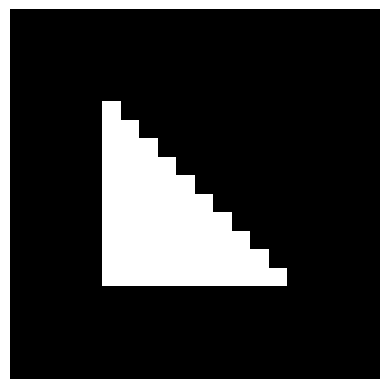

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def generate_triangle_image(img_size, triangle_size, corner_coords):
    """
    Generate a right triangle test image.

    Parameters:
    img_size (tuple): Size of the image (width, height)
    triangle_size (tuple): Size of the right triangle (base, height)
    corner_coords (tuple): Coordinates of the right-angled corner (x, y)
    """
    # Create a blank image
    image = np.zeros(img_size)

    # Define the triangle
    for x in range(corner_coords[0], min(corner_coords[0] + triangle_size[0], img_size[0])):
        for y in range(corner_coords[1], min(corner_coords[1] + triangle_size[1], img_size[1])):
            if (x - corner_coords[0]) + (y - corner_coords[1]) < triangle_size[0]:
                image[y, x] = 1  # Set pixel value

    return image

# Example usage
im_width = 20
tri_width = im_width//2
corner = im_width//4
# im_width = 50
# tri_width = 25
# corner = 12
img_size = (im_width, im_width)  # Image size: 100x100 pixels
triangle_size = (tri_width, tri_width)  # Triangle size: base=50, height=50 pixels
corner_coords = (corner, corner)  # Right-angled corner at (25, 25)

# Generate the image
triangle_image = generate_triangle_image(img_size, triangle_size, corner_coords)

# Display the image
# plt.imshow(triangle_image, cmap='gray')
plt.imshow(np.rot90(triangle_image, 1), cmap='gray')
plt.axis('off')
plt.show()

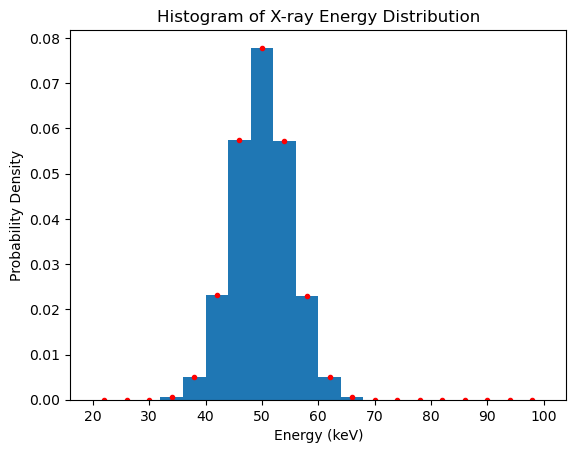

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Sample from the distribution
num_samples = 10**6
mean_energy = 50  # mean energy in keV (example)
std_dev_energy = 5  # standard deviation in keV (example)
sampled_energies = np.random.normal(mean_energy, std_dev_energy, num_samples)

# Define bins
num_bins = 20  # Number of bins
bins = np.linspace(20, 100, num_bins+1)  # Energy range from 20 keV to 100 keV

# Create histogram
hist, bin_edges = np.histogram(sampled_energies, bins=bins, density=True)

# Bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot the histogram
plt.bar(bin_centers, hist, align='center', width=np.diff(bin_edges))
plt.title("Histogram of X-ray Energy Distribution")
plt.xlabel("Energy (keV)")
plt.ylabel("Probability Density")

plt.plot(bin_centers,hist,'r.')
plt.show()


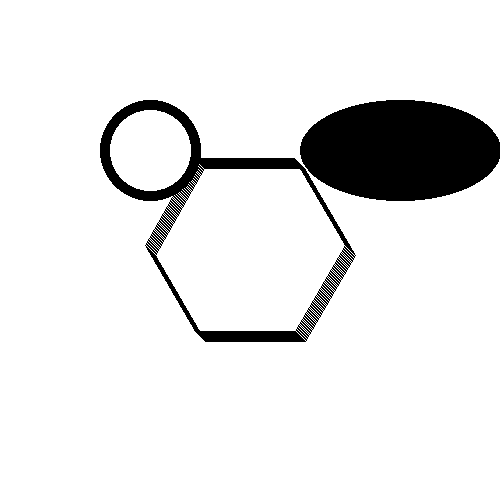

In [11]:
%matplotlib inline
from PIL import Image, ImageDraw
import numpy as np

def draw_shapes(image_size, polygon_sides, polygon_radius, polygon_center, polygon_thickness,
                circle_radius, circle_center, ellipse_bounds, ellipse_angle, line_thickness):
    """
    Draws a specified hollow polygon, circle, and non-hollow ellipse on a square image.

    Parameters:
    - image_size: Size of the square image (width, height).
    - polygon_sides: Number of sides in the polygon.
    - polygon_radius: Radius of the circumscribed circle of the polygon.
    - polygon_center: Center of the polygon (x, y).
    - polygon_thickness: Thickness of the polygon's outline.
    - circle_radius: Radius of the circle.
    - circle_center: Center of the circle (x, y).
    - ellipse_bounds: Bounds of the ellipse (x0, y0, x1, y1).
    - ellipse_angle: Angle of the ellipse in degrees (currently not used in this simplified version).
    - line_thickness: Thickness of the lines for drawing shapes.
    """
    
    # Create a blank image
    image = Image.new('RGB', (image_size, image_size), 'white')
    draw = ImageDraw.Draw(image)

    # Draw the hollow polygon
    angle = np.linspace(0, 2 * np.pi, polygon_sides, endpoint=False)
    polygon = [(polygon_center[0] + polygon_radius * np.cos(a), polygon_center[1] + polygon_radius * np.sin(a)) for a in angle]
    for i in range(-polygon_thickness//2, polygon_thickness//2+1):
        offset_polygon = [(p[0] + i, p[1] + i) for p in polygon]
        draw.polygon(offset_polygon, outline='black', fill=None)

    # Draw the circle (hollow by drawing a white circle inside a larger black one)
    draw.ellipse((circle_center[0]-circle_radius, circle_center[1]-circle_radius, circle_center[0]+circle_radius, circle_center[1]+circle_radius), outline='black', width=line_thickness)
    
    # Draw the non-hollow ellipse
    draw.ellipse(ellipse_bounds, fill='black')
    # To make the polygon hollow, you might draw a smaller polygon inside it or simply adjust the polygon's outline thickness if that's an option

    # Draw the circle (hollow by drawing a white circle inside a larger black one)
    draw.ellipse((circle_center[0]-circle_radius, circle_center[1]-circle_radius, circle_center[0]+circle_radius, circle_center[1]+circle_radius), outline='black', width=line_thickness)
    
    # Draw the non-hollow ellipse
    draw.ellipse(ellipse_bounds, fill='black')

    return image

# Example usage
image_size = 500
polygon_sides = 6
polygon_radius = 100
polygon_center = (250, 250)
polygon_thickness = 10  # Note: This version does not use thickness for the polygon, needs a different approach
circle_radius = 50
circle_center = (150, 150)
ellipse_bounds = (300, 100, 500, 200)
ellipse_angle = 30  # Note: Currently not used in this simplified version
line_thickness = 10

image = draw_shapes(image_size, polygon_sides, polygon_radius, polygon_center, polygon_thickness,
                    circle_radius, circle_center, ellipse_bounds, ellipse_angle, line_thickness)
image

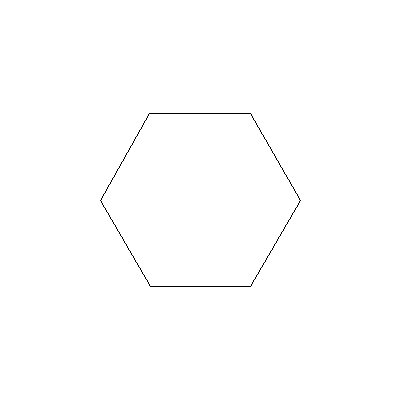

In [14]:
from PIL import Image, ImageDraw

def draw_hollow_polygon(image_size, num_sides, radius, center, line_thickness, fill_color='black', background_color='white'):
    """
    Draws a hollow polygon on a square image.

    Parameters:
    - image_size: Size of the square image (width, height).
    - num_sides: Number of sides in the polygon.
    - radius: Radius of the circumscribed circle of the polygon.
    - center: Center of the polygon (x, y).
    - line_thickness: Thickness of the polygon's outline.
    - fill_color: Color of the polygon's outline.
    - background_color: Background color of the image.
    """
    # Create a blank image
    image = Image.new('RGB', (image_size, image_size), background_color)
    draw = ImageDraw.Draw(image)

    # Calculate the outer polygon's vertices
    outer_polygon = [
        (center[0] + radius * cos(2 * pi * i / num_sides), center[1] + radius * sin(2 * pi * i / num_sides))
        for i in range(num_sides)
    ]

    # Draw the outer polygon
    draw.polygon(outer_polygon, outline=fill_color, fill=None)

    # Calculate the inner polygon's vertices (for the hollow effect)
    inner_radius = radius - line_thickness
    inner_polygon = [
        (center[0] + inner_radius * cos(2 * pi * i / num_sides), center[1] + inner_radius * sin(2 * pi * i / num_sides))
        for i in range(num_sides)
    ]

    # Draw the inner polygon with the background color to create the hollow effect
    if inner_radius > 0:  # Ensure the inner radius is positive
        draw.polygon(inner_polygon, outline=background_color, fill=background_color)

    return image

# Example usage
from math import cos, sin, pi

image_size = 400
num_sides = 6  # For example, a hexagon
radius = 100
center = (200, 200)
line_thickness = 20

image = draw_hollow_polygon(image_size, num_sides, radius, center, line_thickness)
image

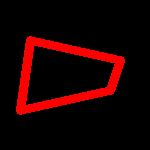

In [17]:
from PIL import Image, ImageDraw

points = (
    (30, 40),
    (120, 60),
    (110, 90),
    (20, 110),
    (30, 40),
    )

im = Image.new("RGB", (150, 150))
dr = ImageDraw.Draw(im)
dr.line(points, fill="red", width=9)
for point in points:
    dr.ellipse((point[0] - 4, point[1] - 4, point[0]  + 4, point[1] + 4), fill="red")
im

In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io, measure, img_as_ubyte, img_as_float
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 
base_dir = os.path.abspath('/dtu/3d-imaging-center/projects/2022_DANFIX_Vindelev/analysis/s214743_bsc/')

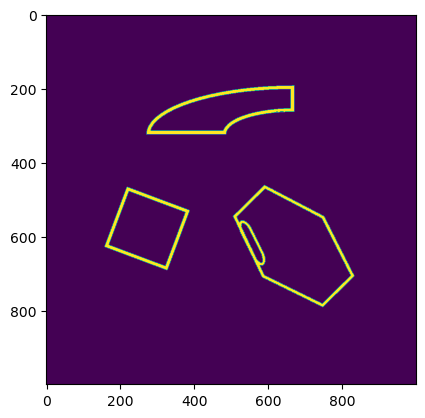

In [28]:
im = io.imread(os.path.join(base_dir,'test_images/test_image_shapes.png'))
im2 = color.rgb2gray(im) == 0
plt.imshow(im2*1.0)

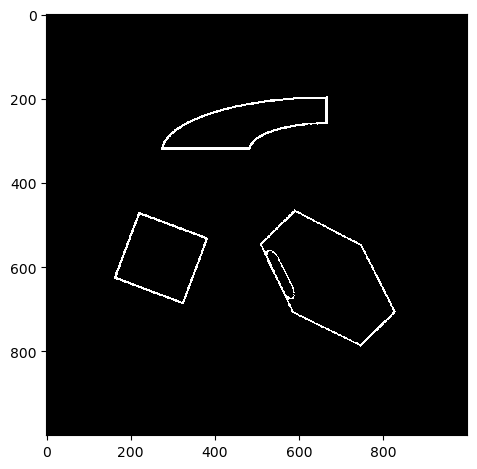

In [40]:
im3 = erosion(im2,footprint=disk(1))
im3 = erosion(im3,footprint=disk(1))
# im3 = erosion(im3,footprint=disk(1))
io.imshow(im3)

In [4]:
from scipy.optimize import curve_fit
import numpy as np

# convert your arrays to numpy arrays
x = np.array([0.004,0.005,0.006,0.007])
y = np.array([0.001,0.095,0.026,0.307])

# Choose the function form of your likings here
def f(x, c):
    return c*x

# parameters and parameter covariances
popt, pcov = curve_fit(f, x, y)
c = popt

In [5]:
popt,pcov

(array([22.095238]), array([[112.26946397]]))

In [4]:
import os
import pickle
from cil.utilities.display import show_geometry, show2D, show1D

In [7]:
base_dir = os.path.abspath('/dtu/3d-imaging-center/projects/2022_DANFIX_Vindelev/analysis/s214743_bsc/')
file_path = os.path.join(base_dir,'centres/X20_ROI2.pkl')
with open(file_path, 'rb') as file:
    data = pickle.load(file)

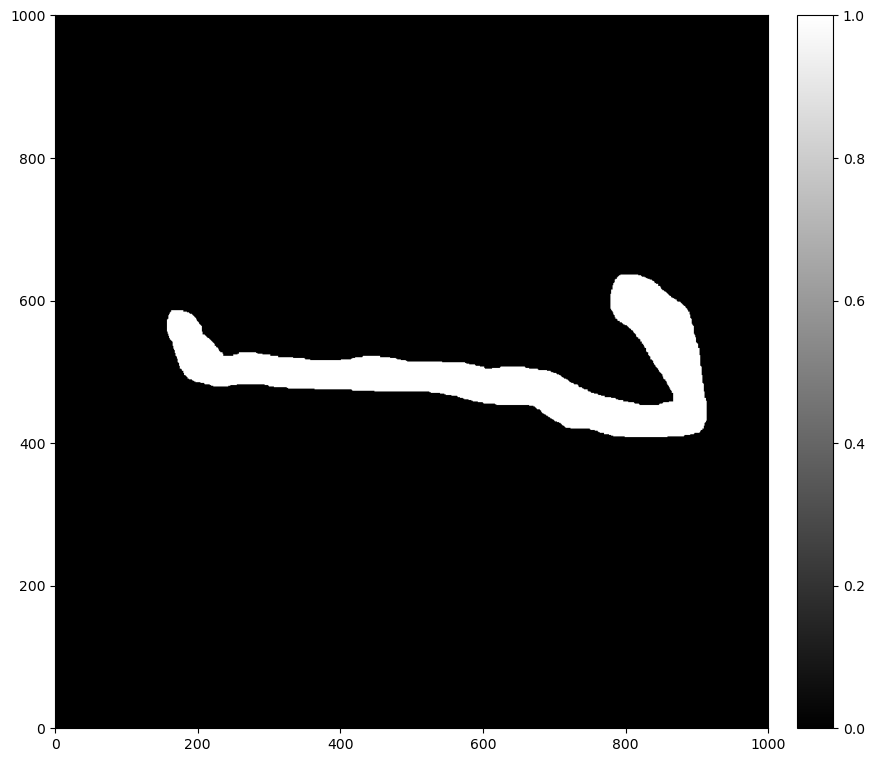

In [8]:
show2D(data)